In [6]:
!pip install git+https://github.com/Shima-shoki/GcomcTool

  Cloning https://github.com/Shima-shoki/GcomcTool to /tmp/pip-req-build-y42nkzgr
  Running command git clone -q https://github.com/Shima-shoki/GcomcTool /tmp/pip-req-build-y42nkzgr
  Created wheel for GcomcTool: filename=GcomcTool-1.0-py3-none-any.whl size=6872 sha256=fe56e99fa711c74c0e233cf233c92127be1f0f8889a47da345178e6d7c566512
  Stored in directory: /tmp/pip-ephem-wheel-cache-aef8g88b/wheels/47/91/25/7d9387bf733c694b292ae08ee984e2576920d908e8fc774c33
Successfully built GcomcTool


In [7]:
!pip show GcomcTool

Name: GcomcTool
Version: 1.0
Summary: This code can handle the level-2 tile products of the GCOM-C satellite datasets.
Home-page: https://github.com/Shima-shoki/GcomcTool
Author: shoki shimada
Author-email: shokishimada@gmail.com
License: UNKNOWN
Location: /home/shimasho/.local/lib/python3.8/site-packages
Requires: 
Required-by: 


In [48]:
from GcomcTool.GcomcTool import GcomCpy
import GcomcTool
GcomcTool.GcomcTool.gdal.__version__

'3.2.1'

In [10]:
test=GcomCpy()
test

This progdam was tested under the GDAL 3.2.2.


Tile number vv:4 hh:26
Tile number vv:4 hh:27
Tile number vv:4 hh:28
Tile number vv:4 hh:29
Tile number vv:5 hh:27
Tile number vv:5 hh:28
Tile number vv:5 hh:29
Tile number vv:5 hh:30
The available L2 tile datasets can be found here: https://suzaku.eorc.jaxa.jp/GCOM_C/data/product_std.html


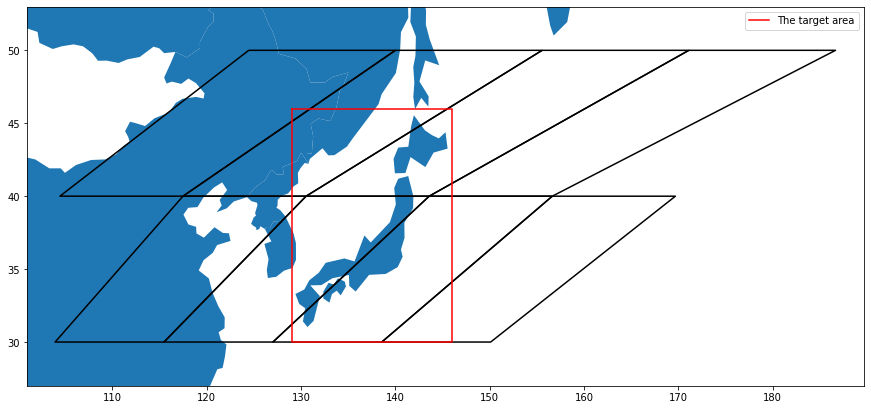

In [12]:
ROI=[129,30,146,46]
test.query_tiles(ROI,focus=True)

In [13]:
test.filter_products('AGB_','2019-07-01','2019-07-10','SHIMADA',period='01M')

Filtering process has started...
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0426_L2SG_AGB_K_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0427_L2SG_AGB_K_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0428_L2SG_AGB_K_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0429_L2SG_AGB_K_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0527_L2SG_AGB_K_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0528_L2SG_AGB_K_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0529_L2SG_AGB_K_2000.h5']
['/standard/GCOM-C/GCOM-C.SGLI/L2.LAND.AGB_.Statistics/2/2019/07/GC1SG1_20190701D01M_T0530_L2SG_AGB_K_2000.h5']


In [17]:
test.get_products('/home/shimasho/デスクトップ/GCOM-C_test')

100%|██████████| 8/8 [00:02<00:00,  2.79it/s]


In [21]:
test.reproject_all('AGB_AVE',clip=True)

100%|██████████| 8/8 [00:34<00:00,  4.33s/it]
